<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/Exercise_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d7ed04978b5e472f830876dc87a4a500a866fd96cf2fa51dc002838b19fbbea0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


6.116360174112235


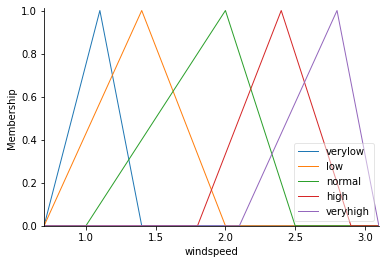

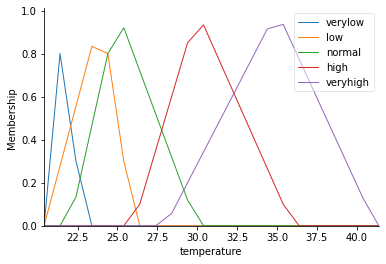

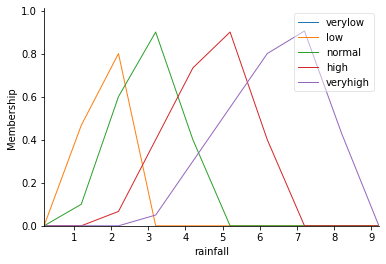

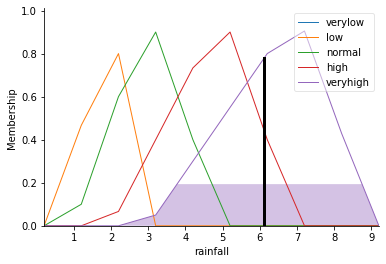

In [2]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
windspeed= ctrl.Antecedent(np.arange(0.7,3.2,0.1),"windspeed")
temperature = ctrl.Antecedent(np.arange(20.4,42,1),"temperature")
rainfall = ctrl.Consequent(np.arange(0.2,9.5,1),"rainfall")
windspeed['verylow']= fuzz.trimf(windspeed.universe,[0.7,1.1,1.4])
windspeed['low']= fuzz.trimf(windspeed.universe,[0.7,1.4,2])
windspeed['normal']=fuzz.trimf(windspeed.universe,[1,2,2.5])
windspeed['high']= fuzz.trimf(windspeed.universe,[1.8,2.4,2.9])
windspeed['veryhigh']= fuzz.trimf(windspeed.universe,[2.1,2.8,3.1])


temperature['verylow']= fuzz.trimf(temperature.universe,[20.4,21,23])
temperature['low']= fuzz.trimf(temperature.universe,[20.4,24,26])
temperature['normal']= fuzz.trimf(temperature.universe,[22,25,30])
temperature['high']= fuzz.trimf(temperature.universe,[26,30,36])
temperature['veryhigh']= fuzz.trimf(temperature.universe,[28,35,41.2])


rainfall['verylow']= fuzz.trimf(rainfall.universe,[0.2,0.5,1])
rainfall['low']= fuzz.trimf(rainfall.universe,[0.5,2,3])
rainfall['normal']= fuzz.trimf(rainfall.universe,[1,3,5])
rainfall['high']= fuzz.trimf(rainfall.universe,[2,5,7])
rainfall['veryhigh']= fuzz.trimf(rainfall.universe,[3,7,9.1])

windspeed.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(windspeed['verylow']&temperature['verylow'],rainfall['verylow']) 
rule2 = ctrl.Rule(windspeed['verylow']&temperature['low'],rainfall['verylow'])  
rule3 = ctrl.Rule(windspeed['verylow']&temperature['normal'],rainfall['low'])
rule4 = ctrl.Rule(windspeed['verylow']&temperature['high'],rainfall['normal'])
rule5 = ctrl.Rule(windspeed['verylow']&temperature['veryhigh'],rainfall['normal'])

rule6 = ctrl.Rule(windspeed['low']&temperature['verylow'],rainfall['verylow'])
rule7 = ctrl.Rule(windspeed['low']&temperature['low'],rainfall['low'])
rule8 = ctrl.Rule(windspeed['low']&temperature['normal'],rainfall['normal'])
rule9 = ctrl.Rule(windspeed['low']&temperature['high'],rainfall['normal'])
rule10 = ctrl.Rule(windspeed['low']&temperature['veryhigh'],rainfall['high'])

rule11 = ctrl.Rule(windspeed['normal']&temperature['verylow'],rainfall['low'])
rule12 = ctrl.Rule(windspeed['normal']&temperature['low'],rainfall['normal'])
rule13 = ctrl.Rule(windspeed['normal']&temperature['normal'],rainfall['normal'])
rule14 = ctrl.Rule(windspeed['normal']&temperature['high'],rainfall['high'])
rule15 = ctrl.Rule(windspeed['normal']&temperature['veryhigh'],rainfall['high'])

rule16 = ctrl.Rule(windspeed['high']&temperature['verylow'],rainfall['normal'])
rule17 = ctrl.Rule(windspeed['high']&temperature['low'],rainfall['normal'])
rule18 = ctrl.Rule(windspeed['high']&temperature['normal'],rainfall['high'])
rule19 = ctrl.Rule(windspeed['high']&temperature['high'],rainfall['veryhigh'])
rule20 = ctrl.Rule(windspeed['high']&temperature['veryhigh'],rainfall['veryhigh'])

rule21 = ctrl.Rule(windspeed['veryhigh']&temperature['verylow'],rainfall['normal'])
rule22 = ctrl.Rule(windspeed['veryhigh']&temperature['low'],rainfall['high'])
rule23 = ctrl.Rule(windspeed['veryhigh']&temperature['normal'],rainfall['high'])
rule24 = ctrl.Rule(windspeed['veryhigh']&temperature['high'],rainfall['veryhigh'])
rule25 = ctrl.Rule(windspeed['veryhigh']&temperature['veryhigh'],rainfall['veryhigh'])


rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling  = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['temperature']=40
rainfalling.input['windspeed']=3
rainfalling .compute()
print(rainfalling.output['rainfall'])
rainfall.view (sim= rainfalling)
